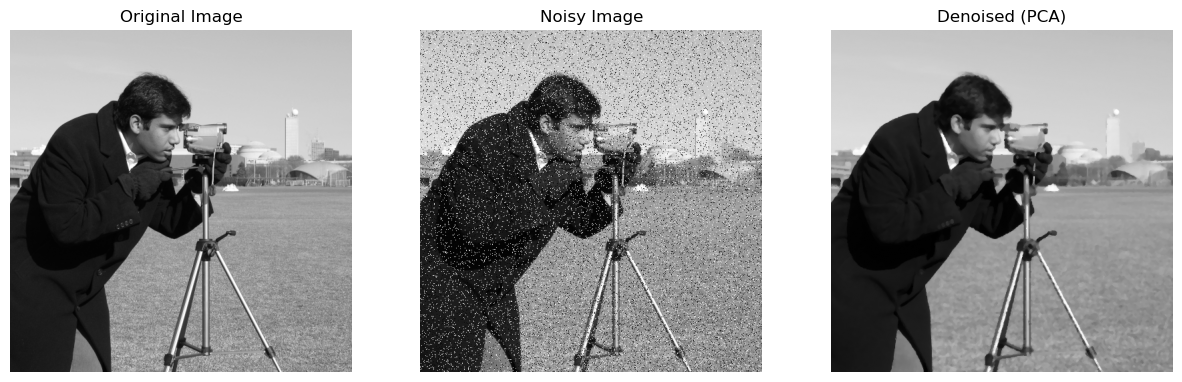

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from skimage import data, img_as_float
from skimage.util import random_noise

# 1. Load a sample grayscale image
image = img_as_float(data.camera())

# 2. Add random noise
noisy_image = random_noise(image, mode='s&p', amount=0.1)  # salt & pepper noise

# 3. Define parallel cellular automaton update rule
def pca_denoise(image, iterations=5):
    """Denoise image using parallel cellular automaton rule."""
    img = image.copy()
    for _ in range(iterations):
        # Parallel update: replace each pixel with median of neighborhood
        new_img = median_filter(img, size=3)
        img = new_img  # All pixels updated simultaneously
    return img

# 4. Apply PCA-based denoising
denoised_image = pca_denoise(noisy_image, iterations=4)

# 5. Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Noisy Image')
ax[2].imshow(denoised_image, cmap='gray')
ax[2].set_title('Denoised (PCA)')
for a in ax:
    a.axis('off')
plt.show()
